In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sn.set(style="ticks", rc=custom_params)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Датасеты" data-toc-modified-id="Датасеты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Датасеты</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Наименования-столбцов" data-toc-modified-id="Наименования-столбцов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Наименования столбцов</a></span></li><li><span><a href="#Проверка-на-пропуски" data-toc-modified-id="Проверка-на-пропуски-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка на пропуски</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li></ul></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Анализ-А/B-теста" data-toc-modified-id="Анализ-А/B-теста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ А/B теста</a></span><ul class="toc-item"><li><span><a href="#Кумулятивная-выручка-по-дням" data-toc-modified-id="Кумулятивная-выручка-по-дням-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Кумулятивная выручка по дням</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-дням" data-toc-modified-id="Кумулятивный-средний-чек-по-дням-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Кумулятивный средний чек по дням</a></span></li><li><span><a href="#Кумулятивная-конверсия" data-toc-modified-id="Кумулятивная-конверсия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Кумулятивная конверсия</a></span></li></ul></li><li><span><a href="#Анализ-выбросов" data-toc-modified-id="Анализ-выбросов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ выбросов</a></span><ul class="toc-item"><li><span><a href="#Анализ-кол-ва-заказов" data-toc-modified-id="Анализ-кол-ва-заказов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ кол-ва заказов</a></span></li><li><span><a href="#Анализ-суммы-заказа" data-toc-modified-id="Анализ-суммы-заказа-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ суммы заказа</a></span></li></ul></li><li><span><a href="#Статистический-анализ" data-toc-modified-id="Статистический-анализ-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Статистический анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-сырых-данных" data-toc-modified-id="Анализ-сырых-данных-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Анализ сырых данных</a></span><ul class="toc-item"><li><span><a href="#Различия-в-конверсии" data-toc-modified-id="Различия-в-конверсии-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Различия в конверсии</a></span></li><li><span><a href="#Различия-в-среднем-чеке" data-toc-modified-id="Различия-в-среднем-чеке-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Различия в среднем чеке</a></span></li></ul></li><li><span><a href="#Анализ-очищенных-данных" data-toc-modified-id="Анализ-очищенных-данных-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Анализ очищенных данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-очищенных-данных" data-toc-modified-id="Подготовка-очищенных-данных-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Подготовка очищенных данных</a></span></li><li><span><a href="#Различия-в-конверсии" data-toc-modified-id="Различия-в-конверсии-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Различия в конверсии</a></span></li><li><span><a href="#Различия-в-среднем-чеке" data-toc-modified-id="Различия-в-среднем-чеке-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Различия в среднем чеке</a></span></li></ul></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

<font color='Black' size=+1><b>Анализ результатов А/В тестирования:</b></font><br>

Совместно с отделом маркетинга нашего интернет-магазина мы подготовили список гипотез для увеличения выручки.
Сегодня нашими задачами будут:

- Приоритизация подготовленных гипотезы;
- Запуск и проведение А/В-тестирования;
- Анализ и интерпретация результатов теста.

В конце ответим на вопросы:

- На каких гипотезах стоит остановиться?
- Оценим достаточность данных о результатах теста;
- Рассчитаем статистическую значимость различий между группами;
- Примем решение о завершении / продлении тестирования.

**План работы:**

1 этап. Общая информация о датасете. 
- Изучим базовую информацию о данных;
- Получим данные о столбцах, кол-ве значений и типах данных;
---------------------
2 этап. Предобработка. 
- Изучим датасеты, обозначим проблемы в данных;
- Приведём в соответствие типы данных;
- При необходимости устраним дублирующиеся значения, пропуски и прочие недостатки;
--------------------- 
3 этап. Приоритизация гипотез. 
- Составим рейтинг гипотез с помощью фреймворков ICE и RICE;
--------------------- 
4 этап. Анализ A/B-тестирования. 
- Построим графики кумулятивной выручки по группам;
- Построим графики кумулятивного среднего чека по группам;
- Построим графики кумулятивной конверсии по группам;
- Изучим результаты теста на предмет аномалий и выбросов;
----------------------
5 этап. Статистический анализ. 
- Очистим данные от аномалий;
- Рассчитаем статистическую значимость различий в показателях групп;
-----------------------
6 этап. Итоги.
- Дадим рекомендации по выбору приоритетных гипотез;
- Подведём итоги тестирования.

-----------------------

## Знакомство с данными

Прочитаем файлы датасетов и запишем их в переменные:

In [3]:
try:
    hypothesis = pd.read_csv('H://Jupiter/hypothesis.csv')
    orders = pd.read_csv('H://Jupiter/orders.csv')
    visitors = pd.read_csv('H://Jupiter/visitors.csv')
    
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

### Датасеты

Выведем на экран общую информацию по датасетам и первые пять строк каждого из них:

**Гипотезы**

In [4]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Заказы**

In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


**Пользователи**

In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


## Предобработка данных

На этапе предобработки нам нужно:
- Привести наименования столбцов в надлежащий вид;
- Изменить тип данных в столбцах с датами;
- Проверить базы на наличие дубликатов и пропусков;

### Типы данных

Приведём ячейки с датами к соответствующему типу:

In [10]:
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

### Наименования столбцов

Приведём наименования столбцов к нижнему регистру:

In [11]:
def temp(data):
    data.columns = data.columns.str.lower()
    for x in data.columns:
        if ' ' in x:
            data = data.rename(columns = {x:x.replace(' ', '_')})
    return data

In [12]:
hypothesis, orders, visitors = [temp(dataset) for dataset in [hypothesis, orders, visitors]]
hypothesis.sample()

,hypothesis,reach,impact,confidence,efforts
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8


### Проверка на пропуски

Узнаем кол-во пропусков в датасетах:

In [13]:
for dataset in [hypothesis, orders, visitors]:
    print(f'Кол-во пропусков: \n{dataset.isna().sum()}')
    print()

Кол-во пропусков: 
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

Кол-во пропусков: 
transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

Кол-во пропусков: 
date        0
group       0
visitors    0
dtype: int64



### Проверка на дубликаты

Узнаем кол-во пропусков в датасетах:

In [14]:
for dataset in [hypothesis, orders, visitors]:
    print(f'Кол-во дубликатов в датасете: {dataset.duplicated().sum()}')

Кол-во дубликатов в датасете: 0
Кол-во дубликатов в датасете: 0
Кол-во дубликатов в датасете: 0


In [15]:
orders.groupby('group')['visitorid'].count()

group
A    557
B    640
Name: visitorid, dtype: int64

Явных дубликатов не обнаружено. В группах равное кол-во пользователей. 

______________________________


Проверим, есть ли в базе покупатели, находящиеся одновременно в двух группах. 
Если такие найдутся, соберём индексы всех их заказов в список.  

In [16]:
#разобьём заказы на переменные по группам

vis_a = orders.query('group == "A"')['visitorid'].unique()
vis_b = orders.query('group == "B"')['visitorid'].unique()

In [17]:
#создадим пустой список, куда будем добавлять индексы заказов конкретных пользователей,
#чьи заказы попадали ошибочно попадали одновременно в разные группы.

error_index = []
for x in vis_b:
    if x in vis_a:
        for i in range(0, max(orders['visitorid'].value_counts())): #чтобы не потерять пользователей с большим кол-вом покупок
            try:
                error_index.append(orders.loc[orders['visitorid'] == x].index.values[i])
            except:
                pass

print('Заказов с пересекающимися группами:', len(error_index))

Заказов с пересекающимися группами: 181


Нашёлся 181 такой заказ. Всего же у нас в датасете 1197 заказов. Т.е. ошибочных заказов - 15%. Удалять их нежелательно: слишком велика доля от общего числа, это может повлиять на результаты исследования. 

Нам необходимо среди них найти заказы с корректно присвоенной группой и присвоить эту группу остальным заказам соответствующих пользователей. 

Возможностей идентифицировать корректную группу у нас немного. Самый понятный из них - это найти первую покупку для каждого из проблемных пользователей.

In [18]:
true_group = orders.query(
    '@orders.index in @error_index' #выделяем идентификаторы ошибочных покупок из полного списка
    ).sort_values(
        by=['visitorid','date']     #сортируем срез по пользователю и дате, затем группируем по пользователю
        ).groupby('visitorid').agg(
        {
            'group':'first'         #находим первую покупку для каждого пользователя
        }
    )

true_group.head()

,group
visitorid,
8300375,B
199603092,B
232979603,B
237748145,A
276558944,A


Теперь мы знаем группу, которую присвоили каждому из проблемных пользователей изначально, в первой покупке. Осталось присвоить эту группу остальным покупкам пользователя:

In [19]:
for index in true_group.index:
    orders.loc[orders['visitorid'] == index, 'group'] = true_group.loc[index, 'group']

Устроим быструю проверку результатов:

In [20]:
temp_a = orders.query('group == "A"')['visitorid'].unique()
temp_b = orders.query('group == "B"')['visitorid'].unique()

In [21]:
error_temp = []
for x in temp_b:
    if x in temp_a:
        for i in range(0, max(orders['visitorid'].value_counts())):
            try:
                error_temp.append(orders.loc[orders['visitorid'] == x].index.values[i])
            except:
                pass

print('Заказов с пересекающимися группами:', len(error_temp))

Заказов с пересекающимися группами: 0


Ошибочных заказов не осталось. Можем двигаться дальше.

**Дубликаты в гипотезах**

Осталось проверить датасеты на наличие неявных. В данных есть только один столбец со строковыми значениями, в котором может закрасться такой дубликат. Проверим столбец с текстом гипотез:

In [22]:
display(hypothesis['hypothesis'].unique()) 

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Все гипотезы отличаются. Дубликатов нет. 

___________________

**Вывод**

Предобработка завершена:
- Проверили датасеты на пропуски и дубликаты;
- Скорректировали наименования столбцов;
- Проверили типы данных;

На следующем этапе подготовим необходимые функции для анализа базы.

## Приоритизация гипотез

Рассчитаем значения приоритетов для гипотез по двум методикам: ICE и RICE

In [23]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],1)
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

Рассмотрим изменения в приоритетах при смене методики расчёта. Присвоим ранги гипотезам по каждому из двух методов:

In [24]:
hypothesis['rank_ICE'] = hypothesis['ICE'].rank(ascending=False, method='first').astype('int')
hypothesis['rank_RICE'] = hypothesis['RICE'].rank(ascending=False, method='first').astype('int')

hypothesis.sort_values(by=['rank_ICE', 'rank_RICE'])

,hypothesis,reach,impact,confidence,efforts,ICE,RICE,rank_ICE,rank_RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2,1,5
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0,2,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0,3,1
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0,4,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0,5,2
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0,6,7
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0,7,8
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0,8,6
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0,9,9


По результатам расчётов в двух методиках явными лидерами можно назвать гипотезы **0** и **7**: они заняли высокие места в обоих случаях. 

Гипотеза **7** поднялась выше в RICE, поскольку в этом методе появился фактор охвата. Добавление формы подписки на все страницы позволит охватить абсолютно всех пользователей. Это делает гипотезу очень привлекательной. 

Гипотеза **0** опустилась со второго на третье место по той же причине - из-за охвата. Несмотря на уверенность команды в успехе этой гипотезы, она охватит лишь треть от всех пользователей. Тем не менее, она всё ещё заслуживает внимания. 

Показательным падением можно назвать гипотезу **8** - с первого места в ICE до пятого в RICE. Акции в дни рождения действительно привлекательны и почти наверняка будут эффективны. Однако охват аудитории в моменте сильно ограничен их сутью. 

Так же можно отметить гипотезу **5** - из-за хорошего потенциального охвата её ранг в RICE вырос с 5-го до 2-го места. Блоки рекомендаций на сайте действительно могут оказаться хорошей идеей. Её минус - предстоит относительно простое, но более долгое тестирование.

__________________

**Вывод:**
В условиях ограниченности ресурсов дополнительный показатель Reach в методе RICE играет важную роль при оценке приоритетов гипотез. Проверять гипотезы или внедрять изменения в продукт без оглядки на потенциальный охват аудитории может оказаться весьма рискованным. Поэтому к А/B тестированию однозначно стоит рекомендовать гипотезы **0** и **7**:

- `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`;
- `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`. 

Дополнительно стоит реализовать гипотезу **5** - `Запустить акцию, дающую скидку на товар в день рождения`. Несмотря на низкий охват и потенциально долгое тестирование, эта активность с высокой вероятностью принесёт результаты. 

## Анализ А/B теста

### Кумулятивная выручка по дням

Первым делом сформируем из имеющихся данных рабочие датасеты для последующего анализа и построения графиков:

In [25]:
dates_groups = orders[['date', 'group']].drop_duplicates()

orders_agg = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_agg = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulative_data = orders_agg.merge(
    visitors_agg, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulative_data.columns = ['date','group','orders','buyers','revenue','visitors']

cumulative_data['conversion'] = (
    cumulative_data['orders'] / cumulative_data['visitors']
)

cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

Основа готова. Можно строить графики. Начнём с кумулятивной выручки по дням для обих подгрупп:

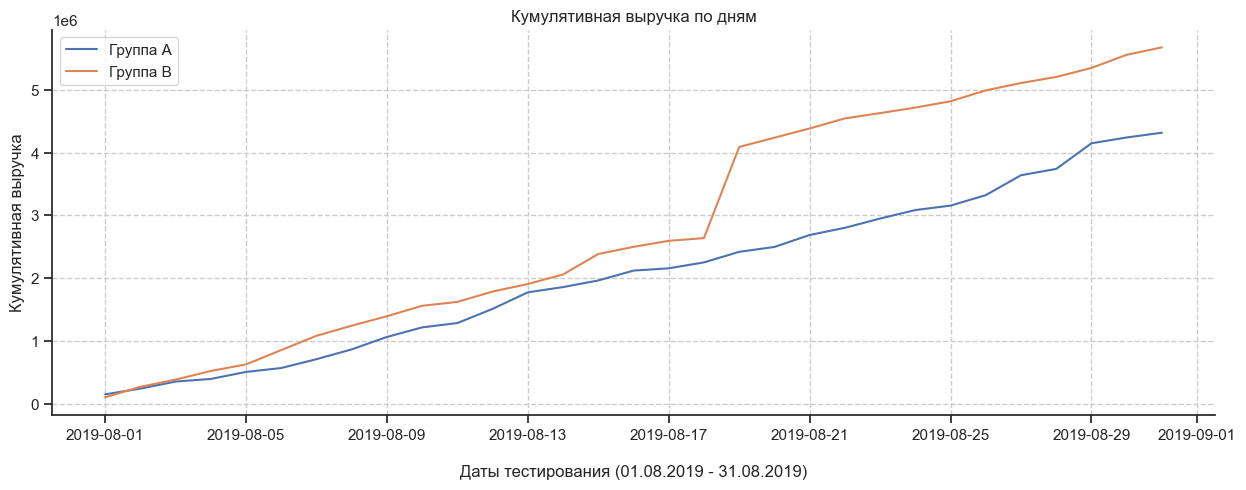

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах A и B
cumulative_revenue_A = cumulative_data_A[['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data_B[['date','revenue', 'orders']]

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'])
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'])

plt.title('Кумулятивная выручка по дням')
ax.set_ylabel('Кумулятивная выручка', loc='center')
ax.set_xlabel('\n' + 'Даты тестирования (01.08.2019 - 31.08.2019)', loc='center')
plt.grid(visible=True, which='major', axis='both', ls='--')
plt.legend(['Группа А', 'Группа B']);

**Наблюдения:**

По графику видно, что группа B на второй день обгоняет группу А по выручке, и далее оба графика растут примерно с одинаковой скоростью за небольшим преимуществом покупателей B. Однако 19 августа у группы B происходит резкий скачок в выручке. Далее графики у обеих групп растут с прежней стабильной скоростью. 

Причин у скачка может быть две - всплеск числа покупателей или наличие крупных покупок в конкретный день. Нам предстоит это выяснить далее.

### Кумулятивный средний чек по дням

Построим график кумулятивного среднего чека:

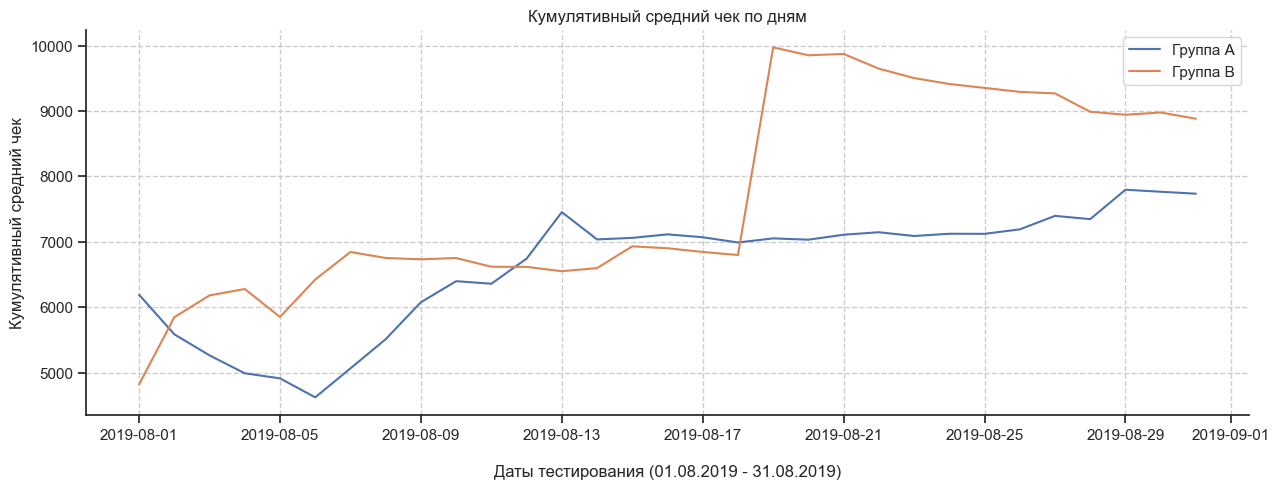

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'])
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'])



plt.title('Кумулятивный средний чек по дням')
ax.set_ylabel('Кумулятивный средний чек', loc='center')
ax.set_xlabel('\n' + 'Даты тестирования (01.08.2019 - 31.08.2019)', loc='center')
plt.grid(visible=True, which='major', axis='both', ls='--')
plt.legend(['Группа А', 'Группа B']);

**Наблюдения:**

В течение первых двух недель графики двух групп по очереди обгоняли друг друга, затем стабилизовались у отметки в 7000 руб. с минимальным преимуществом группы А. На отметке 19 августа у группы B видим тот же скачок, как и на графике выручки. После скачка линия начинает постепенно снижаться. 

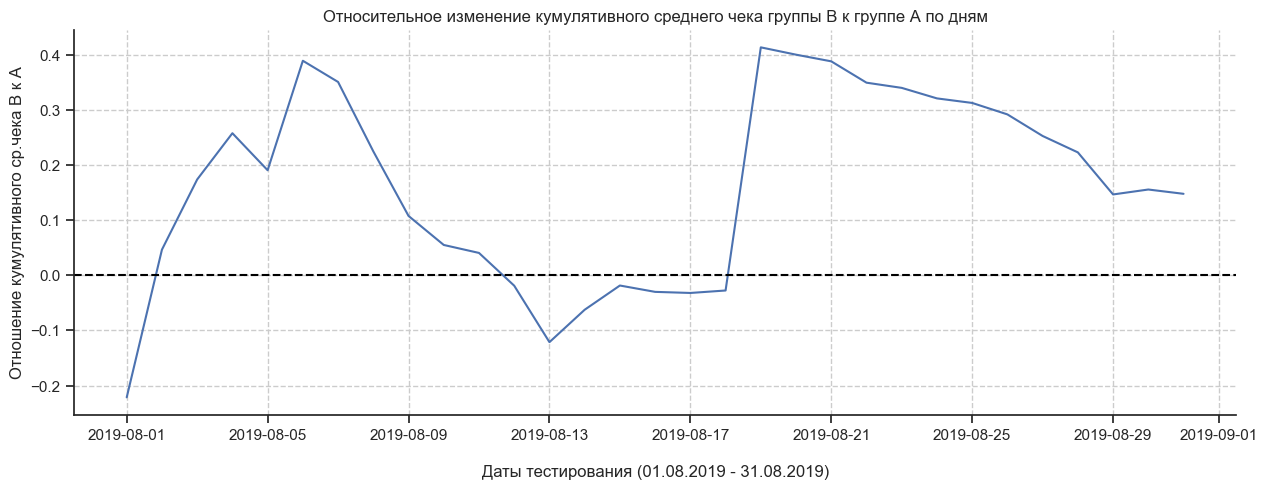

In [28]:
# собираем данные в одном датафрейме
merged_CR = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(merged_CR['date'], (merged_CR['revenueB']/merged_CR['ordersB'])/(merged_CR['revenueA']/merged_CR['ordersA'])-1)

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А по дням')
ax.set_ylabel('Отношение кумулятивного ср.чека B к А', loc='center')
ax.set_xlabel('\n' + 'Даты тестирования (01.08.2019 - 31.08.2019)', loc='center')
plt.grid(visible=True, which='major', axis='both', ls='--')
plt.axhline(y=0, color='black', linestyle='--');

**Наблюдения:**

Наличие скачка (крупного заказа) несколько искажает картину, и мы не можем сказать с точностью, чей кумулятивный средний чек окажется выше. Первые две недели графики двигались в сторону стабилизации, и группа А вышла немного вперёд. Скачок же меняет положение дел, последующее снижение относительного графика еще не окончено. 

### Кумулятивная конверсия

Построим график кумулятивной конверсии по дням для обеих групп. Зададим масштаб, чтобы колебания графиков не отвлекали от общей картиины.

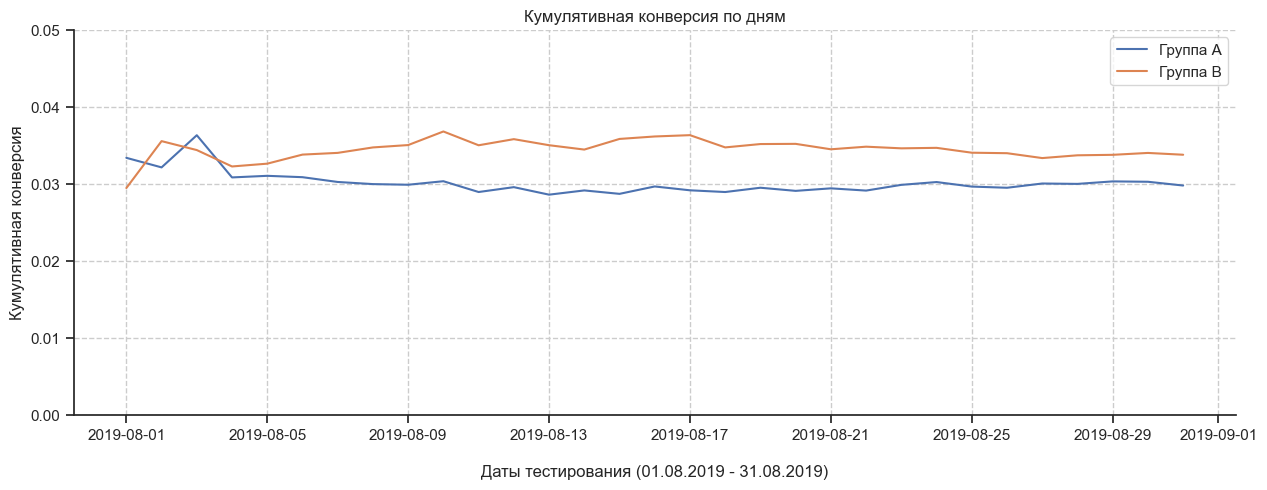

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['orders'] / cumulative_data_A['visitors'])
plt.plot(cumulative_data_B['date'], cumulative_data_B['orders'] / cumulative_data_B['visitors'])



plt.title('Кумулятивная конверсия по дням')
ax.set(ylim=(0, 0.05))
ax.set_ylabel('Кумулятивная конверсия', loc='center')
ax.set_xlabel('\n' + 'Даты тестирования (01.08.2019 - 31.08.2019)', loc='center')
plt.grid(visible=True, which='major', axis='both', ls='--')
plt.legend(['Группа А', 'Группа B']);

**Наблюдения:**

Можно отметить, что примерно через неделю после начала теста графики кумулятивных конверсий по обеим группам стабилизировались. Группа А с результатом **около 3%** уступает группе B. У неё показатели кум.конверсии к концу теста зафиксировались на уровне **около 3.4%**.

Заметим, что заметных скачков конверсии в районе 18 августа нет. Это говорит о том, что всплеска числа пользователей и покупателей в этот день не было. Значит, скачки выручки и среднего чека обусловлены именно дорогостоящими покупками конкретных пользователей. 

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

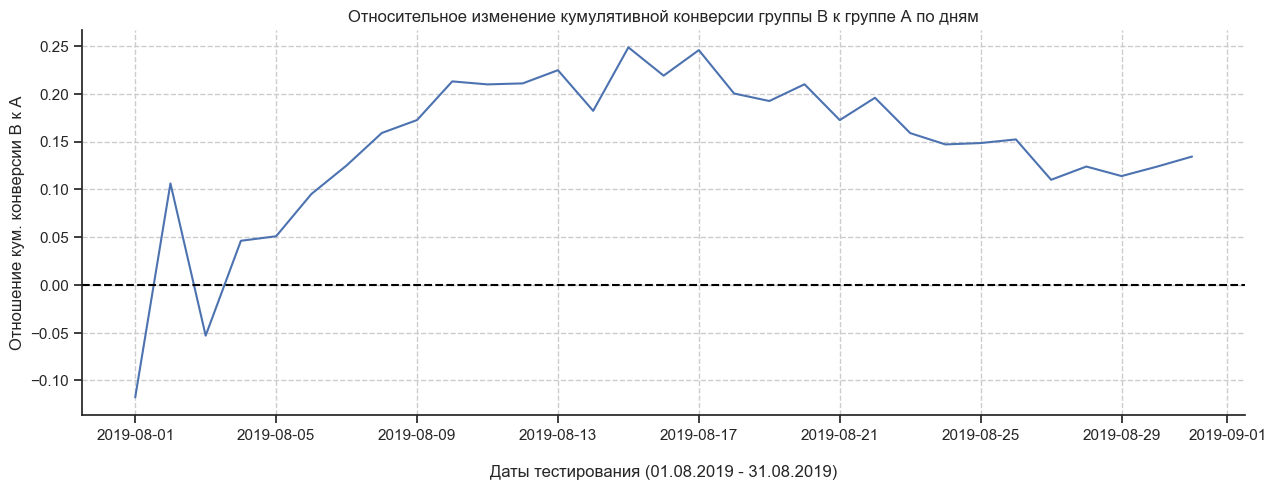

In [30]:
merged_cc = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(merged_cc['date'], merged_cc['conversionB']/merged_cc['conversionA']-1)

plt.title('Относительное изменение кумулятивной конверсии группы B к группе А по дням')
ax.set_ylabel('Отношение кум. конверсии B к А', loc='center')
ax.set_xlabel('\n' + 'Даты тестирования (01.08.2019 - 31.08.2019)', loc='center')
plt.grid(visible=True, which='major', axis='both', ls='--')
plt.axhline(y=0, color='black', linestyle='--');

**Наблюдения:**

Можно отметить, что примерно через неделю после начала теста графики кумулятивных конверсий по обеим группам стабилизировались. Группа А с результатом **около 3%** уступает группе B. У неё показатели кум.конверсии к концу теста зафиксировались на уровне **около 3.4%**.


**Вывод по разделу:**



Можно отметить, что примерно через неделю после начала теста графики кумулятивных конверсий по обеим группам стабилизировались. Группа А с результатом **около 3%** уступает группе B. У неё показатели кум.конверсии к концу теста зафиксировались на уровне **около 3.4%**.


## Анализ выбросов

По графикам мы поняли, что в базе есть пользователи с аномальными покупками, которые могут помешать анализу результатов всего теста. Нам необходимо углубиться в этот вопрос и найти аномалии:

- По кол-ву заказов;
- По сумме заказа;

### Анализ кол-ва заказов

Сгруппируем базу заказов по пользователю и посчитаем кол-во заказазов по каждому из них:

In [31]:
ord_by_user = orders.groupby('visitorid').agg({'transactionid': 'nunique'})
ord_by_user.sort_values(by='transactionid', ascending=False).head(5)

,transactionid
visitorid,
4256040402,11
2458001652,11
2378935119,9
2038680547,8
199603092,5


В базе есть рекордсмены с 11-ю покупками. Необходимо понять, как распределились все покупатели базе. На основе полученной таблицы построим точечный график распределения числа заказов среди пользователей:

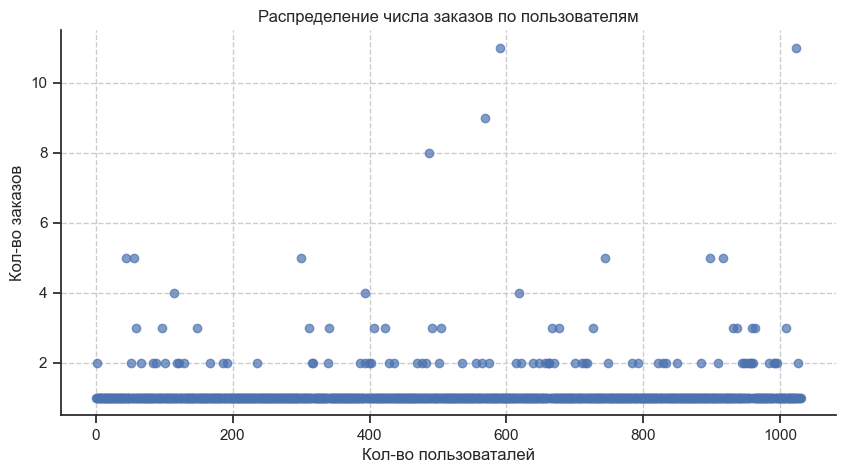

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(pd.Series(range(0,len(ord_by_user))), ord_by_user, alpha=0.7)
plt.grid(visible=True, which='major', axis='both', ls='--')
ax.set_ylabel('Кол-во заказов', loc='center')
ax.set_xlabel('Кол-во пользоваталей', loc='center')
plt.title('Распределение числа заказов по пользователям')
plt.show()

Подавляющее большинство пользователей сделало по одному заказу. Некоторое кол-во совершили 2 или 3 заказа. Единицы сделали больше 3-х покупок. Нам нужно выяснить, каких пользователей считать аномальными по активности. Посчитаем 90-й, 95-й и 99-й перцентиль:

In [33]:
print(np.percentile(ord_by_user['transactionid'], [90, 95, 99])) 

[1. 2. 4.]


95% пользователей сделали две покупки и менее. 99% сделали до 4-х покупок, включительно. При этом по графику мы видим, что пользователей с 4-мя покупками значительно меньше тех, что сделали 3. Посчитаем долю:

In [34]:
print('Доля пользователей с 4-мя и более покупками:',round(1 - len(ord_by_user[ord_by_user['transactionid'] < 4]) / len(ord_by_user), 3))

Доля пользователей с 4-мя и более покупками: 0.013


Пользователей с 4-мя и более покупками лишь 1.3%. Можно отнести их к аномальным.

### Анализ суммы заказа

Построим точечный график для всех заказов, чтобы посмотреть как распределены их размеры:

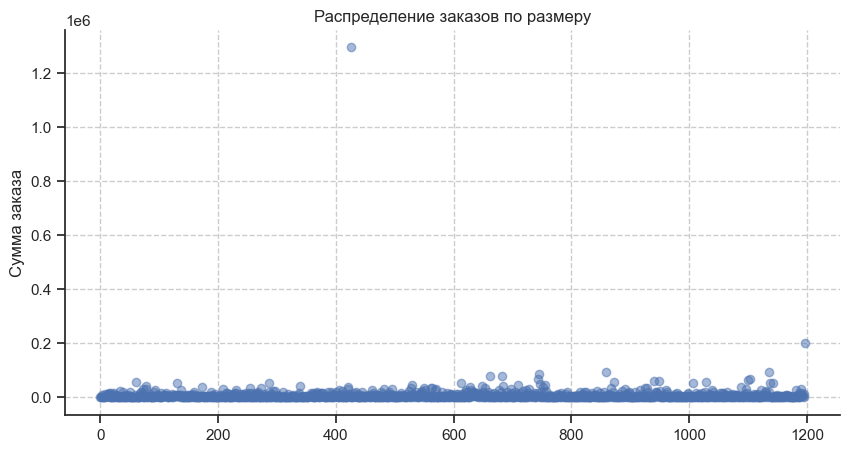

In [35]:
x_values = pd.Series(range(0, len(orders['revenue'])))

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.grid(visible=True, which='major', axis='both', ls='--')
ax.set_ylabel('Сумма заказа', loc='center')
plt.title('Распределение заказов по размеру')
plt.show()

На графике сразу видны два крупных заказа, которые наверняка и стали причиной скачка среднего чека. Размер одного из них и вовсе выдающийся. Найдем их, а затем взглянем на график без их учёта:

In [36]:
orders['revenue'].sort_values(ascending=False).head()

425     1294500
1196     202740
858       93940
1136      92550
744       86620
Name: revenue, dtype: int64

Чтобы излишне не растягивать график, выставим верхнюю границу графика в 100 тысяч:

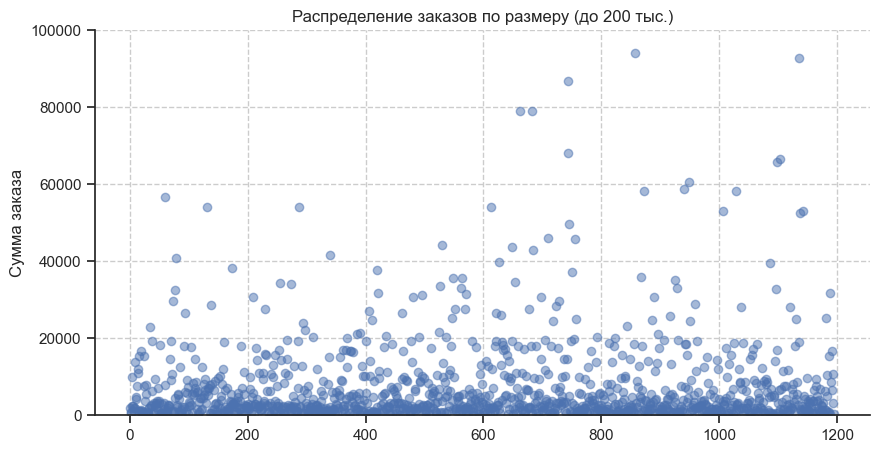

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.ylim(0, 100000)
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.grid(visible=True, which='major', axis='both', ls='--')
ax.set_ylabel('Сумма заказа', loc='center')
plt.title('Распределение заказов по размеру (до 200 тыс.)')
plt.show()

График говорит нам, что подавляющее большинство заказов находится в границах 25 тысяч рублей. Посчитаем 95-й и 99-й процентили, чтобы понять границу "аномальности" для нас:

In [38]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Выберем за границу аномальности значение 99-го процентиля - 58 233 рубля. Экстремально большие заказы отсеем. 

**Подитог:**

Мы изучили распределение базы покупателей по разным показателям и обозначили границы аномальной активности покупателей. Нормальным проявлением активности будем считать:
- Пользователи совершили за рассматриваемый период **до 3-х покупок, включительно**;
- Сумма одного заказа не превышала **58 233 рубля**.

## Статистический анализ

В этом разделе мы проведём статистический анализ различий между двумя группами пользователей и рассчитаем:

- статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке между группами по «сырым» данным. 
- статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке между группами по очищенным данным, без учёта пользователей с аномальным поведением. 
________________
Подготовим данные для анализа:

In [39]:
# Группа А
visitors_daily_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_A.columns = ['date', 'visitors_per_date_A']

visitors_cummulative_A = visitors_daily_A.apply(
    lambda x: visitors_daily_A[visitors_daily_A['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_A.columns = ['date', 'visitors_cummulative_A']

orders_daily_A = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_A.columns = ['date', 'orders_daily_A', 'revenue_per_date_A']

orders_cummulative_A = orders_daily_A.apply(
    lambda x: orders_daily_A[orders_daily_A['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_A.columns = ['date','orders_cummulative_A','revenue_cummulative_A']

In [40]:
# Группа B
visitors_daily_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_B.columns = ['date', 'visitors_per_date_B']

visitors_cummulative_B = visitors_daily_B.apply(
    lambda x: visitors_daily_B[visitors_daily_B['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_B.columns = ['date', 'visitors_cummulative_B']

orders_daily_B = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_B.columns = ['date', 'orders_daily_B', 'revenue_per_date_B']

orders_cummulative_B = orders_daily_B.apply(
    lambda x: orders_daily_B[orders_daily_B['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_B.columns = ['date','orders_cummulative_B','revenue_cummulative_B']

In [41]:
# Сводная таблица с показателями групп по датам
data = (
    orders_daily_A.merge(
        orders_daily_B, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_A, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_B, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_A, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_B, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_A, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_B, left_on='date', right_on='date', how='left')
)

data.head()

,date,orders_daily_A,revenue_per_date_A,orders_daily_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,19,91602,25,167751,43,240181,46,268968,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,67,352654,62,383216,507,509,1845,1803
3,2019-08-04,12,41516,21,137880,79,394170,83,521096,717,770,2562,2573
4,2019-08-05,24,111753,24,104893,103,505923,107,625989,756,707,3318,3280


Создадим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

In [42]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitorid', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitorid', 'orders']

# Итоговые рабочие переменные:
sample_A = pd.concat([orders_by_users_A['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_A'].sum() - 
                                          len(orders_by_users_A['orders'])), 
                          name='orders')],axis=0)

sample_B = pd.concat([orders_by_users_B['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_B'].sum() - 
                                          len(orders_by_users_B['orders'])), 
                          name='orders')],axis=0)

### Анализ сырых данных

#### Различия в конверсии

Обозначим нулевую гипотезу:

- Нулевая гипотеза H0 - статистически значимых различий в конверсии между группами А и В нет.
- Гипотеза H1 - статистически значимые различия в конверсии есть. 

__________

Применим для проверки гипотезы критерий Манна-Уитни и рассчитаем относительный прирост в конверсии группы B к А:

In [43]:
print('P-value:', "{0:.3f}".format(st.mannwhitneyu(sample_A, sample_B)[1]))

print('Относительная разница в конверсии:', "{0:.2%}".format(sample_B.mean() / sample_A.mean() - 1))

P-value: 0.017
Относительная разница в конверсии: 13.43%


P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы можем отвергнуть. **По "сырым" данным различия в конверсии между группами есть.**

Относительный прирост в конверсии у группы B равен 13.43%.


#### Различия в среднем чеке

Обозначим нулевую гипотезу:

- Нулевая гипотеза H0 - статистически значимых различий в среднем чеке между группами А и В нет.
- Гипотеза H1 - статистически значимые различия в среднем чеке между есть. 

__________

Применим для проверки гипотезы критерий Манна-Уитни и рассчитаем относительный прирост в среднем чеке между группы B к А:

In [44]:
print('P-value:', "{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                       orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница в среднем чеке:',"{0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1))

P-value: 0.398
Относительная разница в среднем чеке: 14.82%


P-value = 0.398 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, мы не можем отвергнуть. **По "сырым" данным различия в среднем чеке между группами отсутствуют.**

Относительный прирост в среднем чеке у группы B равен 14.82%. 


### Анализ очищенных данных

#### Подготовка очищенных данных

In [45]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 3]['visitorid'],
        orders_by_users_B[orders_by_users_B['orders'] > 3]['visitorid'],
    ],
    axis=0,
)

expensive = np.percentile(orders['revenue'], 99)
users_with_expensive_orders = orders[orders['revenue'] > expensive]['visitorid']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_users.head())
print()
print('Итого аномальных пользователей:', len(abnormal_users))

1099    148427295
27      199603092
20      237748145
65      457167155
949     887908475
Name: visitorid, dtype: int64

Итого аномальных пользователей: 24


Мы нашли идентификаторы пользователей с аномальной активностью. Таких в базе оказалось 24. Скорректируем рабочие переменные за вычетом заказов этих пользователей:

In [46]:
# Скорректированные рабочие переменные:
f_sample_A = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitorid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

f_sample_B = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitorid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сборки готовы, можно приступать к проверке гипотез.

#### Различия в конверсии

Обозначим нулевую гипотезу:

- Нулевая гипотеза H0 - статистически значимых различий в конверсии между группами А и В нет.
- Гипотеза H1 - статистически значимые различия в конверсии есть. 

__________

Применим для проверки гипотезы критерий Манна-Уитни и рассчитаем относительный прирост в конверсии группы B к А:

In [47]:
print('P-value:', "{0:.3f}".format(st.mannwhitneyu(f_sample_A, f_sample_B)[1]))

print('Относительная разница в конверсии:',"{0:.2%}".format(f_sample_B.mean() / f_sample_A.mean() - 1))

P-value: 0.015
Относительная разница в конверсии: 13.91%


P-value = 0.015 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы как и ранее можем отвергнуть. **По очищенным данным различия в конверсии между группами так же есть.**

Относительный прирост в конверсии у группы B равен 13.91%. По сырым данным прирост был 13.43%, что почти не отличается от результата по очищенным данным. Это хороший знак - конверсия действительно увеличилась.


#### Различия в среднем чеке

Обозначим нулевую гипотезу:

- Нулевая гипотеза H0 - статистически значимых различий в среднем чеке между группами А и В нет.
- Гипотеза H1 - статистически значимые различия в среднем чеке между есть. 

__________

Применим для проверки гипотезы критерий Манна-Уитни и рассчитаем относительный прирост в среднем чеке между группы B к А:

In [48]:
print('P-value:', "{0:.3f}".format(st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormal_users)),)]['revenue'], 
                                       orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormal_users)),)]['revenue'])[1]))
                                              
print('Относительная разница в среднем чеке:',"{0:.2%}".format(orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormal_users)),)]['revenue'].mean()/
                       orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormal_users)),)]['revenue'].mean() - 1))

P-value: 0.545
Относительная разница в среднем чеке: -5.32%


P-value = 0.545 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, мы не можем отвергнуть. **По очищенным данным различия в среднем чеке группами так же отсутствуют.** Отметим, что после удаления аномальных пользователей p-value лишь увеличился. 

Относительная разница в среднем чеке по очищенным данным у группы B стала отрицательной: -5.32%. Т.е. средний чек немного снизился. 

________________


**Вывод по разделу**


Мы провели статистический анализ А/B теста и получили следующие результаты:
- Конверсия в группе В явно выросла: 13.9% роста по отфильтрованным данным, 13.4% по сырым данным с аномальными заказами;
- Без учёта аномальных покупателей средний чек в группе В незначительно снизился - падение на 5.3%. 

## Итоговый вывод

Мы завершили работу с маркетинговыми гипотезами и получили результаты A/B тестирования. Ключевые тезисы:

**Часть 1. Приоритизация гипотез**

С учётом потенциального охвата и результатов активностей рекомендую к проверке / внедрению следующие гипотезы:

- №**0** `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`;
- №**7** `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`. 

Дополнительно стоит обратить внимание на гипотезу **5** - `Запустить акцию, дающую скидку на товар в день рождения`. Несмотря на низкий охват и потенциально долгое тестирование, эта активность с высокой вероятностью принесёт результаты. 

**Часть 2. Проведение A/B тестирования**

Мы разделили пользователей на две группы, провели тестирование в период с 01.08.2019 по 31.09.2019 г. Ключевые инсайты по результатам тестирования:

- Конверсия в группе В явно выросла: 13.9% роста по отфильтрованным данным (без учёта аномальных продаж и активности пользователей);
- Относительная разница в среднем чеке составляет 5.3% в пользу группы А. (без учёта аномальных продаж и активности пользователей);
- При этом по критерию Манна-Уитни статистические различия в среднем чеке между группами отсутствуют. Таким образом, можно сказать что относительное снижение среднего чека является незначительным. 

По результатам анализа можно зафиксировать победу группы А и остановить тест. 
